# Исследование объявлений о продаже квартир

Для выполнения проекта используются данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Задача:**

— выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Ход выполнения задачи:**
- обработать пропуски. Заполнить их или удалить, объяснив почему,
- изменить тип данных для столбцов, где это необходимо,
- обработать дубликаты в столбце с названиями населенных пунктов,
- обработать аномалии во всех столбцах,
- добавить вспомогательные столбцы, необходимые для исследования,
- изучить параметры объектов для обнаружения различных зависимостей между данными.


**Описание данных:**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


### Откройте файл с данными и изучите общую информацию. 

**Импорт необходимых библиотек.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

**Чтение данных из файла.**

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод общей информации о датафрейме.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Видим, что есть несколько столбцов с большим количеством пропусков. Решать это будем в следующем этапе. Пока посмотрим на гистограммы.**

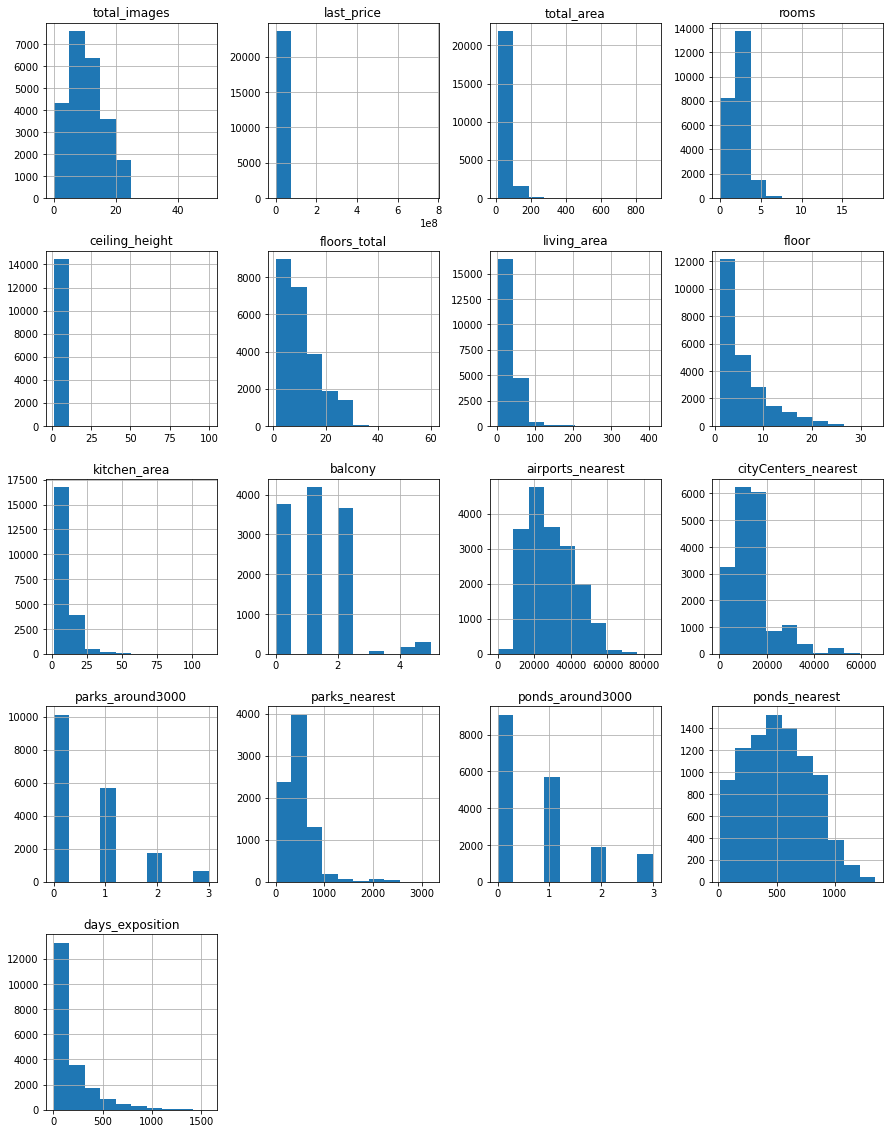

In [4]:
data.hist(figsize=(15,20))
plt.show()

### Предобработка данных

#### Заполнение пропусков

**Выведем список столбцов, в которых есть пропуски.**

In [5]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**Обработка пропусков:**

- **Строки, с пропущенными названиями населенных пунктов (`'locality_name'`), а также с количеством этажей в доме (`'floors_total'`) удалим. Их мало, и их наличие/отсутствие не повлияет на результат анализа.**
- **Пропуски в столбце `'is_apartment'` с булевыми значениями мы заменим на False.**
- **С количеством балконов в столбце `'balcony'` также логично предположить, что пропуск свидетельствует об отсутствии балкона в квартире**
- **Пропуски в столбцах с информацией о парках и прудах (`'parks_nearest', 'ponds_nearest', 'ponds_around3000', 'parks_around3000'`) оставим как есть - будем считать, что знание о наличии парков/прудов рядом с домом для покупателя несущественно.**
- **Пропуски в `'days_exposition'` вероятнее всего свидетельствуют о том, что объявление еще не снято с публикации, также оставим без заполнения.**
- **Информацию о площади кухни и жилого помещения (`'kitchen_area', 'living_area'`) заполнять не будем - это может исказить реальную картину.**
- **Пропуски в столбцах с расстоянием до аэропорта и центра (`'airports_nearest', 'cityCenters_nearest'`) сначала оценим - и если влияния на результат не будет, то заполним медианными значениями по каждому населенному пункту.**

**Удалим строки с пропущенными названиями населенных пунктов и количеством этажей в доме.**

In [6]:
data = data.dropna(subset=['locality_name', 'floors_total'])

**Заполненим пропуски с информацией о количестве балконов и о том, является ли квартира апартаментами.**

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)

**Заполнение пропущенных значений площади кухни и жилого помещения в зависимости от количества комнат в квартире.**

In [8]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

**Значения с большим количеством комнат (>5) пока удалять не будем. Предположим, что в данном случае речь идет о загородных домах. Также настораживает значение комнат = 0. Возможно, кто-то таким образом заполняет квартиры-студии. Посмотрим, сколько всего таких квартир:** 

In [9]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


**Видим, что их мало. Поэтому просто их удалим. Их отсутствие также не повлияет результат.**

In [10]:
data = data.query('rooms != 0')

In [11]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15369
ponds_nearest           14403
ceiling_height           8972
airports_nearest         5447
cityCenters_nearest      5424
ponds_around3000         5423
parks_around3000         5423
days_exposition          3157
kitchen_area             2028
living_area              1854
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**Далее обработаем пропуски только в столбце с расстоянием до аэропорта и центра (`'airports_nearest', 'cityCenters_nearest'`). Их заполним медианными значениями для каждого населенного пункта.**

**Для этого сначала устраним дубликаты в названиях населенных пунктов. Уберем уточнения по типу населенных пунктов.**

In [12]:
data['locality_name'].nunique()

362

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Взглянув на названия, можно собрать список из слов, которые мы удалим.**

In [14]:
list_of_names = ['городской поселок', 'городской посёлок', 'деревня', 
                 'поселок городского типа', 'посёлок городского типа', 
                 'садовое товарищество', 'село', 'посёлок при железнодорожной станции',
                 'садоводческое некоммерческое товарищество', 'коттеджный поселок', 'коттеджный посёлок', 
                 'поселок', 'посёлок', 'пок станции', 'пок']
for name in list_of_names:
    data['locality_name'] = data['locality_name'].str.replace(name, "").str.strip()
    
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [15]:
data['locality_name'].nunique()

304

**До заполнения пропусков в столбце с расстоянием до центра медианными значениями в зависимости от населенного пункта, посмотрим, как данные пропуски распределены, и повлияет ли их заполнение на дальнейший анализ.**

In [16]:
data_distance_nan = data[data['cityCenters_nearest'].isna()]
temp_1 = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False).reset_index()
temp_1.columns = ['locality_name', 'amount_of_objects']

temp_2 = data_distance_nan.groupby('locality_name')['last_price'].count().sort_values(ascending=False).reset_index()
temp_2.columns = ['locality_name', 'amount_of_empty_distances']
empty_distances_df = temp_2.merge(temp_1, on='locality_name', how='left')


empty_distances_df.query('amount_of_empty_distances == amount_of_objects')


,locality_name,amount_of_empty_distances,amount_of_objects
0,Мурино,559,559
1,Кудрово,449,449
2,Всеволожск,392,392
3,Гатчина,307,307
4,Выборг,237,237
...,...,...,...
281,Красносельское,1,1
282,Жил,1,1
283,Котлы,1,1
284,Пустынка,1,1


**Видим, что для 280 из 304 уникальных населенных пунктов значения расстояний не заполнены в принципе. Поэтому пропуски оставим, так как какое-либо их заполнение по другим данным из датафрейма неизбежно повлечет влияние на результат анализа.**

**Заполним пропуски в столбце с высотой потолков (`'ceiling_height'`). Заполним медианными значениями в зависимости от удаленности от центра населенного пункта.**

**Создадим функцию, которая присвоит категорию каждой квартире в зависимости от удаленности от центра.**

In [17]:
def how_far(row):
    distance = row['cityCenters_nearest']
    if distance <= 20000:
        return 'центр'
    elif 20000 < distance <= 40000:
        return 'в пределах города'
    elif 40000 < distance <= 60000:
        return 'ближайший пригород'
    elif distance > 60000:
        return 'дальний пригород'
    else:
        return 'нет информации'
    
data['types_of_distance'] = data.apply(how_far, axis=1)

**Заполним пропуски в столбце с высотой потолков.**

In [18]:
list_of_distances = data['types_of_distance'].unique()
for elem in list_of_distances:
    median = data.loc[data['types_of_distance'] == elem, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['types_of_distance'] == elem), 'ceiling_height'] = median
    

**Взглянем на то, как изменилось количество пропусков в данных и идем дальше.**

In [19]:
data.isna().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
studio                      0
is_apartment                0
floor                       0
open_plan                   0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total                0
types_of_distance           0
living_area              1854
kitchen_area             2028
days_exposition          3157
parks_around3000         5423
ponds_around3000         5423
cityCenters_nearest      5424
airports_nearest         5447
ponds_nearest           14403
parks_nearest           15369
dtype: int64

---

#### Изменение типов данных

**Еще раз взглянем на типы данных в каждом столбце.**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23371 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23371 non-null  int64  
 1   last_price            23371 non-null  float64
 2   total_area            23371 non-null  float64
 3   first_day_exposition  23371 non-null  object 
 4   rooms                 23371 non-null  int64  
 5   ceiling_height        23371 non-null  float64
 6   floors_total          23371 non-null  float64
 7   living_area           21517 non-null  float64
 8   floor                 23371 non-null  int64  
 9   is_apartment          23371 non-null  bool   
 10  studio                23371 non-null  bool   
 11  open_plan             23371 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23371 non-null  float64
 14  locality_name         23371 non-null  object 
 15  airports_nearest   

**Приведем типы некоторых столбцов в соответствие с приложенной документацией: количество балконов в любом случае целое (int) число, столбец с датой также приводим к нужному типу. В некоторых столбцах остались пропуски, поэтому их тип мы поменять не можем (в таких, как `'parks_around3000', 'ponds_around3000', 'days_exposition'`).**

In [21]:
data['balcony'] = data['balcony'].astype('int64')
data['floors_total'] = data['floors_total'].astype('int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

---

#### Обработка аномалий

**Оценим описание данных для каждого столбца. Постараемся выявить и устранить аномальные значения.**

In [22]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23371.000000,2.337100e+04,23371.000000,23371.000000,23371.000000,23371.000000,21517.000000,23371.000000,21343.000000,23371.000000,17924.000000,17947.000000,17948.000000,8002.000000,17948.000000,8968.000000,20214.000000
mean,9.895340,6.566584e+06,60.580161,2.087844,2.727546,10.624235,34.587410,5.856061,10.560994,0.590090,28824.925519,14197.799131,0.613662,490.245564,0.769166,518.244759,181.368458
std,5.682868,1.094248e+07,35.613640,1.066362,0.982289,6.567545,22.083566,4.851830,5.900630,0.960162,12629.362059,8631.610046,0.803026,341.664709,0.939071,278.036420,220.094368
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.200000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18584.250000,9236.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,26770.000000,13092.000000,0.000000,454.000000,0.000000,503.000000,96.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.430000,8.000000,12.000000,1.000000,37289.500000,16285.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Заметим, что в столбце с высотой потолков максимальное значение = 100. Посмотрим на диаграмму размаха и гистограмму.**

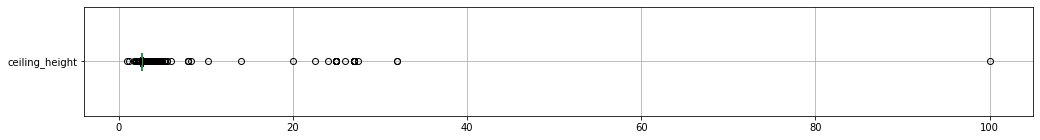

In [23]:
data.boxplot(vert=False, column='ceiling_height', figsize = (17,2))
plt.show()

**Удалим значения, в которых высота потолка более 40, а получившиеся значения от 24 до 40 скорее всего вызваны ошибкой - их нужно разделить на 10.**

In [24]:
data = data.query('ceiling_height < 40 & ceiling_height > 2')
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 50), 'ceiling_height'] = data['ceiling_height'] / 10

In [25]:
# check
data.shape

(23356, 23)

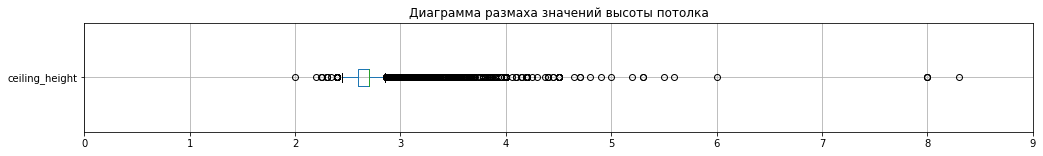

In [26]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['ceiling_height']].boxplot(vert=False, ax=ax)
ax.set_title('Диаграмма размаха значений высоты потолка')
ax.set_xlim(0, 9);

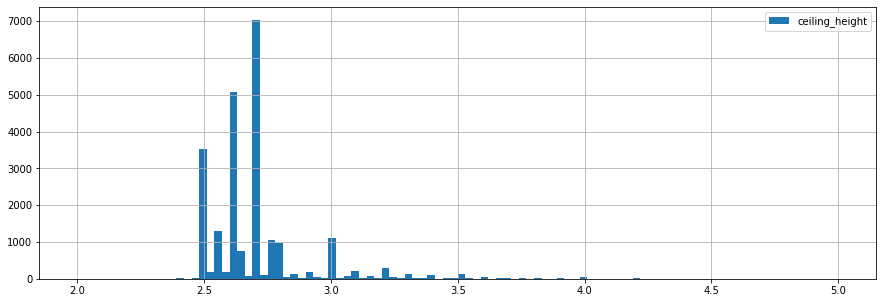

In [27]:
data['ceiling_height'].hist(bins=100, range=(2,5), figsize=(15,5), legend=True)
plt.show()

**Видим, что большинство значений не превышает 4.5м. Ограничимся высоту потолка в объявлениях диапазоном от 2.5 до 4.5м, остальные данные удалим.**

In [28]:
data = data.query('ceiling_height >= 2.5 & ceiling_height <= 4.5')

In [29]:
# check
data.shape

(23276, 23)

**Обработаем столбцы со значениями площадей.**

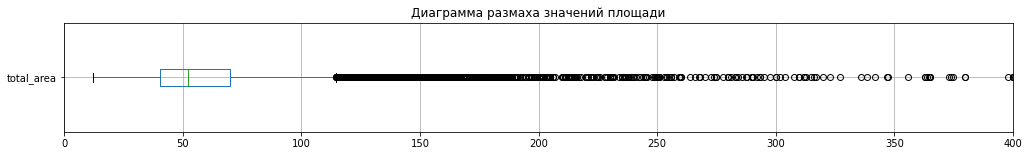

In [30]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

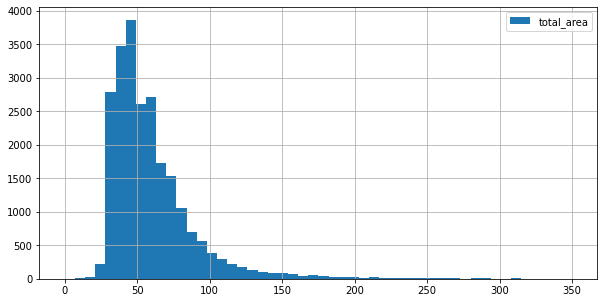

In [31]:
data['total_area'].hist(bins=50, range=(0,350), figsize=(10,5), legend=True)
plt.show()

In [32]:
len(data.query('total_area > 350'))

38

In [33]:
len(data.query('total_area < 20'))

19

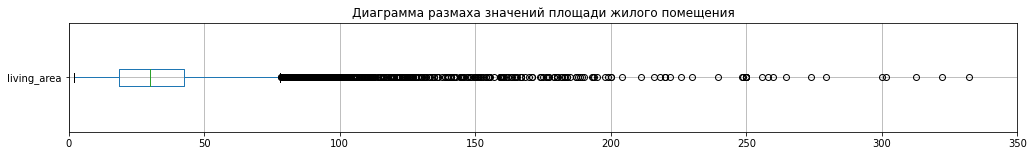

In [34]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['living_area']].boxplot(vert = False, ax=ax)
ax.set_title('Диаграмма размаха значений площади жилого помещения')
ax.set_xlim(0, 350);

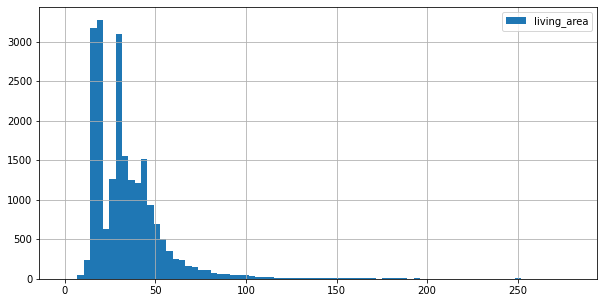

In [35]:
data['living_area'].hist(bins=80, range=(0,280), figsize=(10,5), legend=True)
plt.show()

In [36]:
len(data.query('living_area > 200'))

30

In [37]:
len(data.query('living_area < 10'))

23

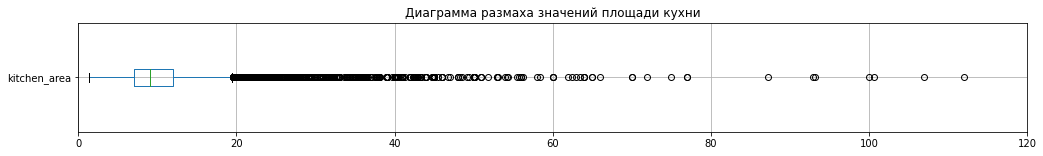

In [38]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади кухни')
ax.set_xlim(0, 120);

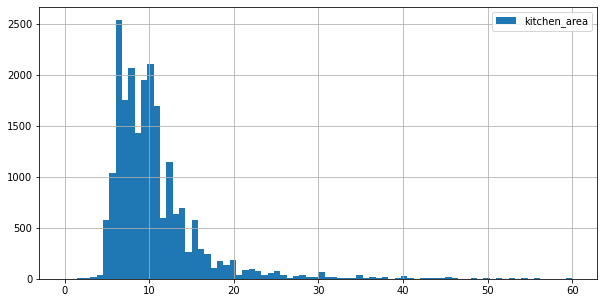

In [39]:
data['kitchen_area'].hist(bins=80, range=(0,60), figsize=(10,5), legend=True)
plt.show()

In [40]:
len(data.query('kitchen_area > 50'))

45

In [41]:
len(data.query('kitchen_area < 4'))

27

**Отбросим объекты с редкими значения площадей. За такие примем те, у которых жилая площадь менее 10 или более 200, площадь кухни менее 4 или более 50, а общая площадь менее 20, либо более 350 квадратных метров. Пропуски обязательно оставляем.**

In [42]:
data = data.query('kitchen_area.isna() | living_area.isna() | \
                (living_area >= 10 & living_area <= 200 \
                  & kitchen_area >= 4 & kitchen_area <= 50 \
                  & total_area >= 20 & total_area <= 350 \
                  & living_area + kitchen_area < total_area * 0.9)')

In [43]:
# check
data.shape

(22708, 23)

**Также отбросим строки с редко встречающимися значениями в столбце с общим количеством этажей в доме.**

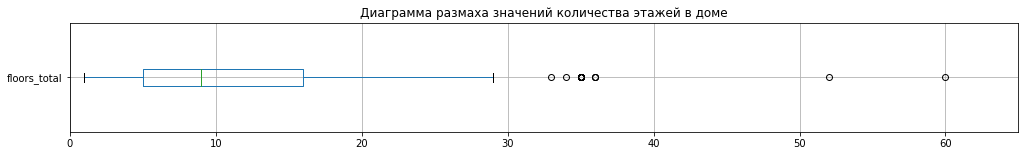

In [44]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества этажей в доме')
ax.set_xlim(0, 65);

**Удалим все значения, в которых высота дома более 30 этажей.**

In [45]:
data = data.query('floors_total < 30')

**Обработаем столбец с количеством прошедних дней с момента публикации объявления до продажи квартиры:**

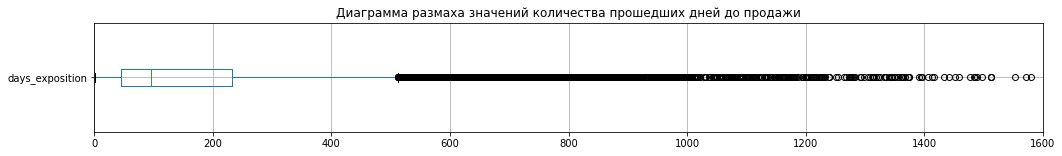

In [46]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества прошедших дней до продажи')
ax.set_xlim(0, 1600);

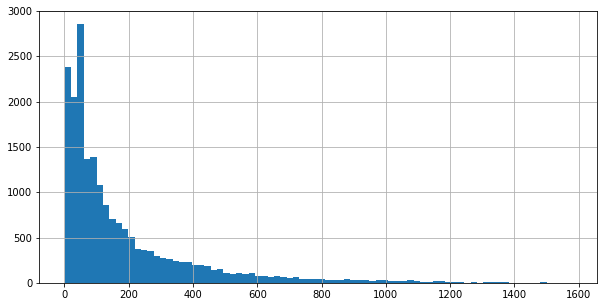

In [47]:
data['days_exposition'].hist(bins=80, figsize=(10,5))
plt.show()

In [48]:
data.query('days_exposition > 1400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,types_of_distance
521,20,25717300.0,230.10,2015-01-21,3,2.60,3,130.00,1,False,...,1,Пушкин,16877.0,29030.0,2.0,676.0,3.0,278.0,1441.0,в пределах города
1109,1,34878556.0,95.80,2014-12-09,2,2.70,6,58.30,5,True,...,1,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0,центр
1885,2,13300000.0,79.60,2014-12-09,2,3.00,8,42.70,7,False,...,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513.0,центр
2941,3,10090000.0,71.90,2015-02-02,2,2.70,10,34.10,9,False,...,2,Санкт-Петербург,23604.0,5294.0,0.0,NaN,1.0,434.0,1458.0,центр
4736,11,6650000.0,68.30,2015-02-19,4,2.63,5,45.10,4,False,...,0,Санкт-Петербург,20182.0,1724.0,3.0,606.0,3.0,453.0,1477.0,центр
6006,4,4400000.0,38.63,2015-02-03,1,2.85,25,15.00,6,False,...,2,Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,1452.0,центр
6691,3,4400000.0,42.98,2014-12-12,1,2.60,5,18.72,1,False,...,0,Пушкин,19715.0,30358.0,1.0,439.0,3.0,232.0,1512.0,в пределах города
6726,6,11995000.0,83.82,2014-11-27,2,2.73,11,42.31,1,False,...,0,Санкт-Петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1406.0,центр
9553,11,10600000.0,80.00,2014-12-09,3,2.85,17,44.00,9,False,...,0,Санкт-Петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553.0,центр
9555,11,9950000.0,61.20,2015-04-06,2,3.17,7,39.70,2,False,...,0,Санкт-Петербург,9740.0,10123.0,1.0,114.0,0.0,NaN,1434.0,центр


**Пока оставим только те строки, для которых прошло не более 1400 дней с момента публикации до продажи, а также строки, для которых значение незаполнено (эти объявления еще не закрыты). Решение об удалении еще большего числа строк примем на следующем этапе.**

In [49]:
data = data.query('days_exposition.isna() | days_exposition <= 1400')

In [50]:
# check
data.shape

(22663, 23)

---

#### Удаление редких значений

**Посмотрим, какое количество строк было удалено на предыдущем этапе:**

In [51]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22663 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22663 non-null  int64         
 1   last_price            22663 non-null  float64       
 2   total_area            22663 non-null  float64       
 3   first_day_exposition  22663 non-null  datetime64[ns]
 4   rooms                 22663 non-null  int64         
 5   ceiling_height        22663 non-null  float64       
 6   floors_total          22663 non-null  int64         
 7   living_area           20819 non-null  float64       
 8   floor                 22663 non-null  int64         
 9   is_apartment          22663 non-null  bool          
 10  studio                22663 non-null  bool          
 11  open_plan             22663 non-null  bool          
 12  kitchen_area          20649 non-null  float64       
 13  balcony         

In [52]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22663.000000,2.266300e+04,22663.000000,22663.000000,22663.000000,22663.000000,20819.000000,22663.000000,20649.000000,22663.000000,17386.000000,17407.000000,17408.000000,7724.000000,17408.000000,8661.000000,19615.000000
mean,9.872744,6.339091e+06,59.799155,2.074792,2.698142,10.638133,33.923726,5.856727,10.336602,0.589375,28879.506615,14260.938473,0.607939,490.668307,0.761029,520.272139,180.181086
std,5.672352,9.372475e+06,31.825845,1.037558,0.210853,6.499640,19.731915,4.826025,5.056115,0.958146,12674.503507,8634.181947,0.798516,341.825232,0.931807,277.541475,216.916997
min,0.000000,1.219000e+04,12.000000,1.000000,2.500000,1.000000,9.000000,1.000000,4.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.100000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18539.000000,9364.000000,0.000000,288.000000,0.000000,296.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26890.000000,13123.000000,0.000000,453.000000,0.000000,504.000000,95.000000
75%,14.000000,6.750000e+06,69.500000,3.000000,2.700000,16.000000,42.000000,8.000000,11.900000,1.000000,37407.000000,16295.000000,1.000000,612.000000,1.000000,733.000000,232.000000
max,50.000000,7.630000e+08,631.000000,16.000000,4.500000,29.000000,250.000000,27.000000,60.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1396.000000


**Видим, что из 23698 изначальных строк на текущий момент осталось 20212 строк.**

**Видим, что в некоторых столбцах разброс минимального-максимального значений очень велик, а также несколько из этих значений могут быть слишком редкими, то есть являться выбросами, от которых стоит избавиться. Внимательнее изучим столбцы (`'rooms'`, `'total_area'`, `'ceiling_height'`,	`'days_exposition'`, `'last_price'`, `'living_area'`, `'kitchen_area'`).**

In [53]:
# check
data.rooms.value_counts().sort_values().to_frame()

,rooms
16,1
14,1
11,2
10,3
9,5
8,10
7,46
6,92
5,303
4,1118


**Оставим только те строки, для которых количество комнат не превышает 7.**

In [54]:
data = data.query('rooms <= 7')

**Далее обработаем столбец со стоимостью проданного объекта.**

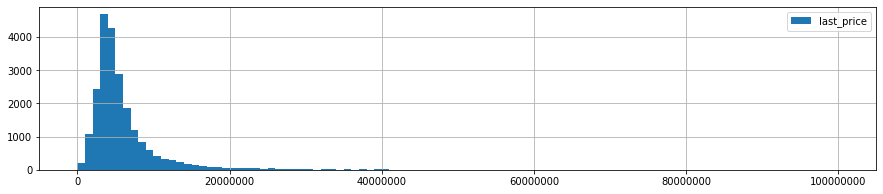

In [55]:
data['last_price'].hist(bins=100, figsize=(15,3), legend=True, range=(0,100000000))
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

**Посмотрим на значения, которые могут быть аномально малы и наоборот, аномально велики:**

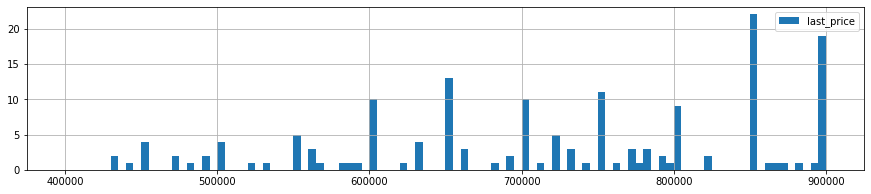

In [56]:
data['last_price'].hist(bins=100, figsize=(15,3), legend=True, range=(400000,900000)) #объекты, проданные менее, чем за 600 тыс рублей
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

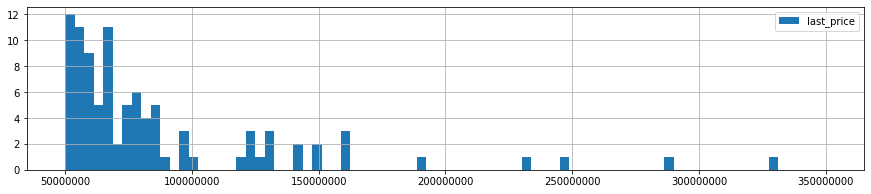

In [57]:
data['last_price'].hist(bins=80, figsize=(15,3), legend=True, 
                        range=(50000000, 350000000)) #объекты, проданные более, чем за 45 млн рублей
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

**Видим, что квартиры, проданные менее, чем за 600 тыс рублей и более, чем за 70 млн рублей встречаются редко. Посмотрим на количество квартир, которые попадают в данные группы и удалим такие строки:**

In [58]:
len(data.query('last_price < 600000'))

31

In [59]:
len(data.query('last_price > 70000000'))

48

In [60]:
data = data.query('last_price >= 600000 & last_price <= 70000000')

In [61]:
data.shape

(22562, 23)

**Далее обработаем аномалии в столбцах с площадями:**

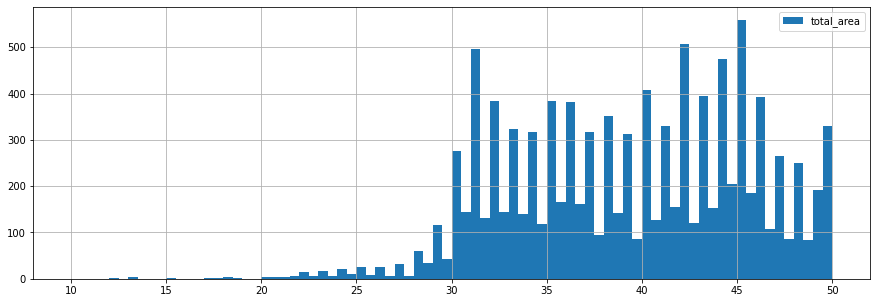

In [62]:
data['total_area'].hist(bins=80, figsize=(15,5), range=(10,50), legend=True)
plt.show()

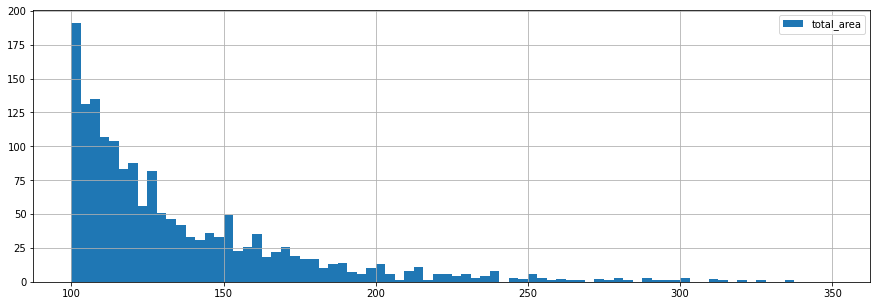

In [63]:
data['total_area'].hist(bins=80, figsize=(15,5), range=(100,350), legend=True)
plt.show()

**Оставим только те строки, для которых общее значение площади попадает в диапазон от 25 до 250м.**

In [64]:
data = data.query('total_area >= 25 & total_area <= 250')

**Аналогичным образом отсеим редкие значения для площади кухни и жилого помещения.**

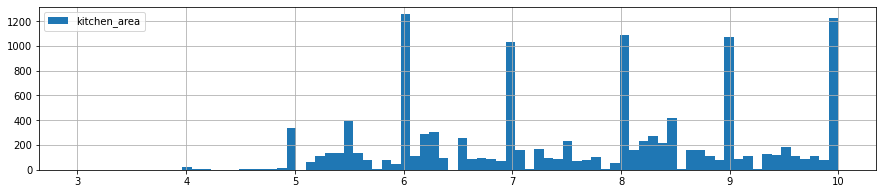

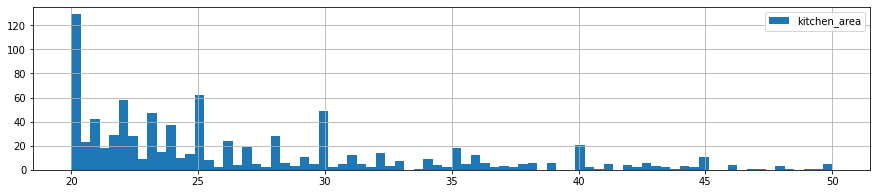

In [65]:
data['kitchen_area'].hist(bins=80, figsize=(15,3), range=(3,10), legend=True)
plt.show()
data['kitchen_area'].hist(bins=80, figsize=(15,3), range=(20,50), legend=True)
plt.show()

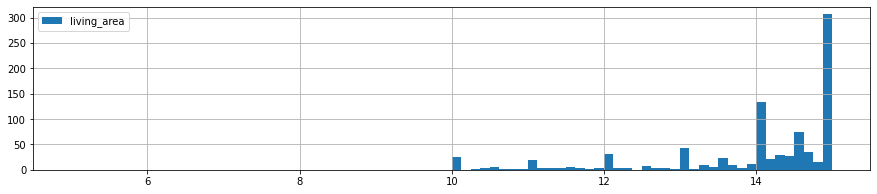

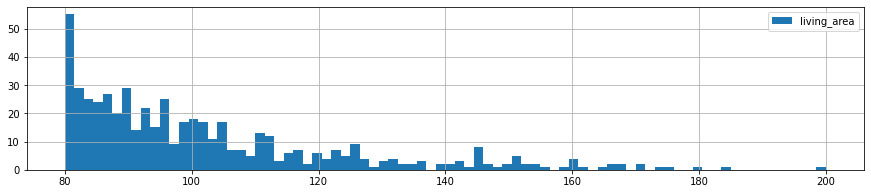

In [66]:
data['living_area'].hist(bins=80, figsize=(15,3), range=(5,15), legend=True)
plt.show()
data['living_area'].hist(bins=80, figsize=(15,3), range=(80,200), legend=True)
plt.show()

**Оставим объявления, для которых площадь кухни попадает в диапазон от 5 до 40 метров, а площадь жилого помещения от 12 до 150 метров. Также обязательно оставим строки с пропусками в данных столбцах, так как они нужны для дальнейшего анализа.**

In [67]:
data = data.query('kitchen_area.isna() | (kitchen_area >= 5 & kitchen_area <= 40) \
& living_area.isna() | (living_area >= 12 & living_area <= 150)')

**Удалим редкие значения для столбца с количеством дней до продажи.**

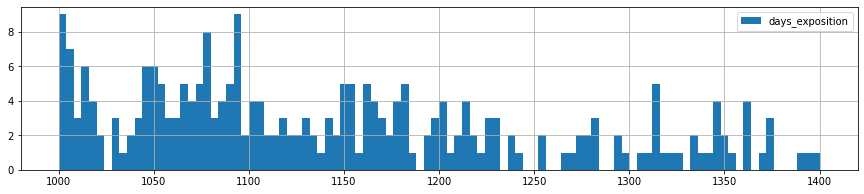

In [68]:
data['days_exposition'].hist(bins=100, figsize=(15,3), range=(1000,1400), legend=True)
plt.show()

**Удалим значения, превыщаюшие 1100 дней, при этом оставим пропуски.**

In [69]:
data = data.query('days_exposition <= 1100 | days_exposition.isna()')

In [70]:
data.shape

(22165, 23)

In [71]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22165.000000,2.216500e+04,22165.000000,22165.000000,22165.000000,22165.000000,20394.000000,22165.000000,20276.000000,22165.000000,17020.000000,17040.000000,17041.000000,7528.000000,17041.000000,8416.000000,19173.000000
mean,9.898489,5.975140e+06,58.717817,2.058967,2.695103,10.648049,33.371165,5.857072,10.216732,0.594180,28912.467509,14342.449061,0.601901,490.524575,0.753712,523.399121,172.470401
std,5.666646,5.053764e+06,27.015176,0.983943,0.205809,6.493029,17.444523,4.818887,4.812565,0.961416,12704.687860,8604.005989,0.791953,339.144889,0.928340,277.270733,198.344901
min,0.000000,6.000000e+05,25.000000,1.000000,2.500000,1.000000,10.000000,1.000000,4.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.469000e+06,40.400000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18488.000000,9533.500000,0.000000,288.000000,0.000000,301.000000,45.000000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26980.000000,13168.000000,0.000000,455.000000,0.000000,507.000000,94.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.700000,1.000000,37412.000000,16316.250000,1.000000,613.000000,1.000000,733.000000,226.000000
max,50.000000,6.850000e+07,250.000000,7.000000,4.500000,29.000000,200.000000,27.000000,50.000000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,1100.000000


**От редких значений также удалось избавиться. Переходим к добавлению вспомогательных столбцов.**

---

### Посчитайте и добавьте в таблицу новые столбцы

**Добавим в датафрейм следующие столбцы:**
- **С ценой одного квадратного метра,**
- **С днем недели публикации объявления,**
- **С месяцем публикации объявления,**
- **С годом публикации объявления,**
- **С типом этажа квартиры,**
- **С расстоянием до центра города в километрах.**

**Столбец с ценой одного квадратного метра для каждого объявления:**

In [72]:
pd.options.display.float_format = '{:.2f}'.format
data['one_sqrmeter_price'] = data['last_price'] / data['total_area']

**Столбцы, созданные с учетом даты (день, месяц, год) публикации объявления:**

In [73]:
data['day_of_publishment'] = data['first_day_exposition'].dt.weekday # день недели публикации
data['month_of_publishment'] = data['first_day_exposition'].dt.month # месяц публикации
data['year_of_publishment'] = data['first_day_exposition'].dt.year # год публикации

**Столбец с типом этажа квартиры (первый, последний, другой). Для заполнения столбца используем функцию:** 

In [74]:
def which_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 0 or row['floor'] < 0:
        return 'ошибка в данных'
    else:
        return 'другой'

data['floor_type'] = data.apply(which_floor, axis=1)

**Столбец с расстоянием до центра в километрах:**

In [75]:
data['distance_to_center_km'] = round(data['cityCenters_nearest'] / 1000)

**Все вспомогательные столбцы добавлены, можно переходить к анализу данных.**

---

### Проведите исследовательский анализ данных

#### Исследование данных в столбцах - построение диаграмм

**Сначала рассмотрим столбцы, со значениями площадей (кухни, жилой зоны, общей площади) в квартирах.**

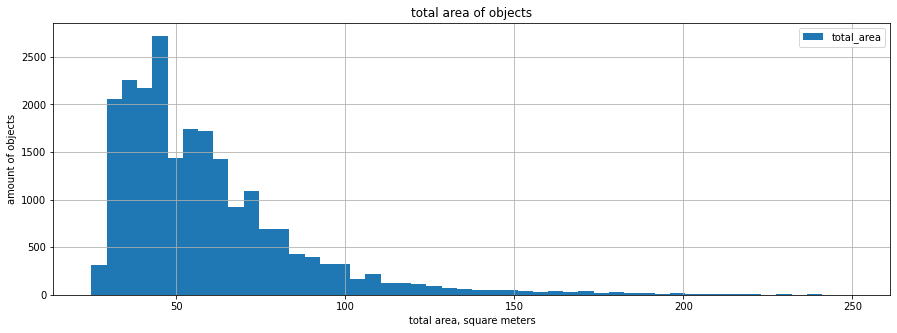

In [76]:
data['total_area'].hist(bins=50, legend=True, figsize=(15,5))
plt.xlabel('total area, square meters')
plt.ylabel('amount of objects')
plt.title('total area of objects')
plt.show()

**Видим, что большинство квартир в списке - площадью от 30 до 150 квадратных метров.**

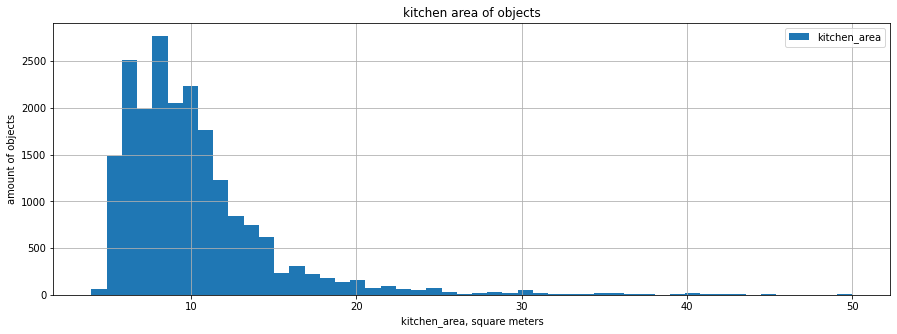

In [77]:
data['kitchen_area'].hist(bins=50, legend=True, figsize=(15,5))
plt.xlabel('kitchen_area, square meters')
plt.ylabel('amount of objects')
plt.title('kitchen area of objects')
plt.show()

**Площадь кухни у большинства объявлений находится в диапазоне от 5 до 30 квадратных метров.**

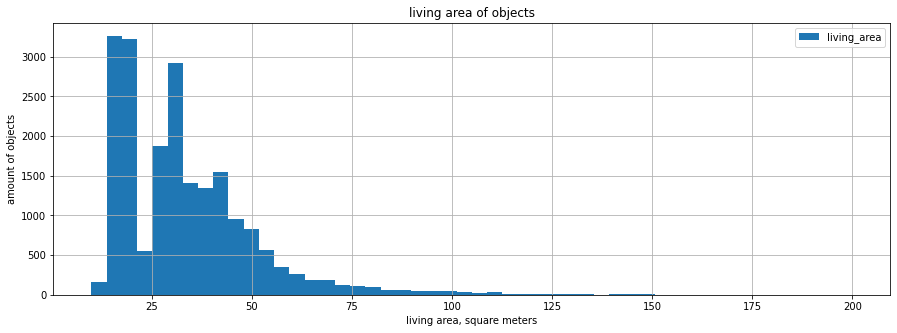

In [78]:
data['living_area'].hist(bins=50, legend=True, figsize=(15,5))
plt.xlabel('living area, square meters')
plt.ylabel('amount of objects')
plt.title('living area of objects')
plt.show()

**Видим два больших пика значений площади жилого помещения - в районе 15-20 и 25-35 квадратных метров. Практически все значения попадают в диапазон от 10 до 80 квадратных метров.**

**Посмотрим на стоимость объектов.**

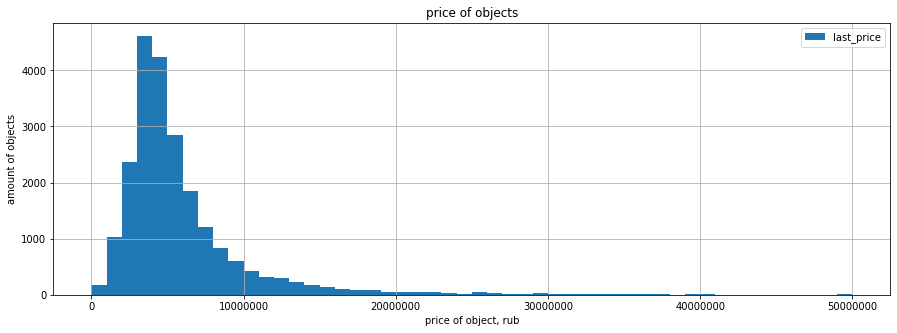

In [79]:
data.plot(y='last_price', kind='hist', bins=50, grid=True, range=(0,50000000), figsize=(15,5))
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('price of object, rub')
plt.ylabel('amount of objects')
plt.title('price of objects')
plt.show()

**Стоимость большинства объектов попадает в диапазон 2-20 млн рублей.**

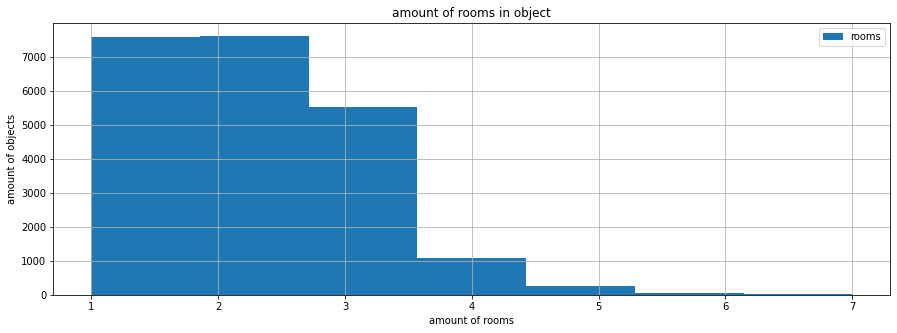

In [80]:
data['rooms'].hist(bins=7, legend=True, figsize=(15,5))
plt.xlabel('amount of rooms')
plt.ylabel('amount of objects')
plt.title('amount of rooms in object')
plt.show()

**Большинство квартир в датафрейме 1-3 комнатные.**

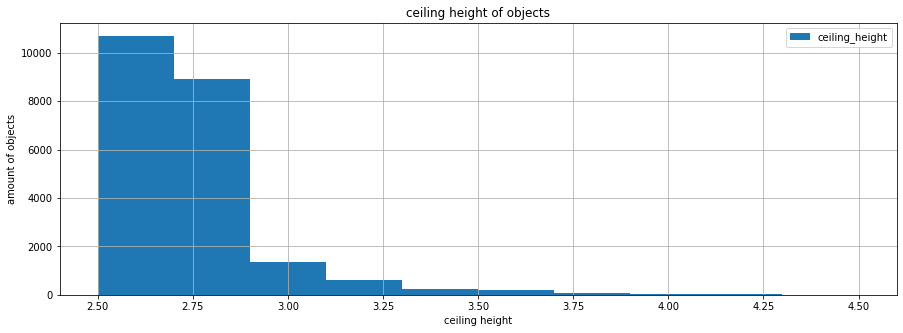

In [81]:
data['ceiling_height'].hist(bins=10, legend=True, figsize=(15,5))
plt.xlabel('ceiling height')
plt.ylabel('amount of objects')
plt.title('ceiling height of objects')
plt.show()

**Высота потолка для большинства квартир - от 2.5 до 3м.**

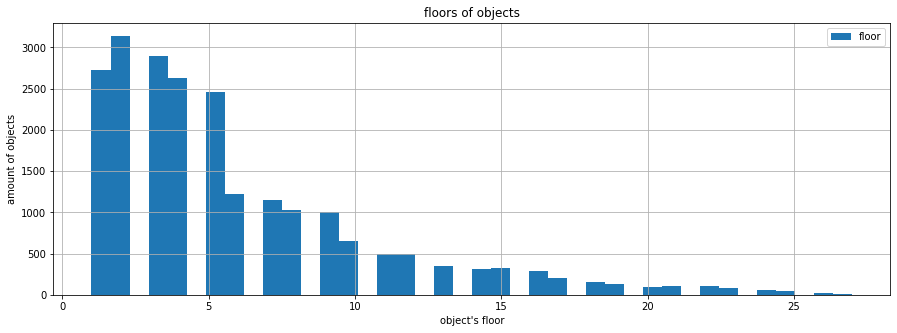

In [82]:
data['floor'].hist(bins=40, legend=True, figsize=(15,5))
plt.xlabel("object's floor")
plt.ylabel('amount of objects')
plt.title('floors of objects')
plt.show()

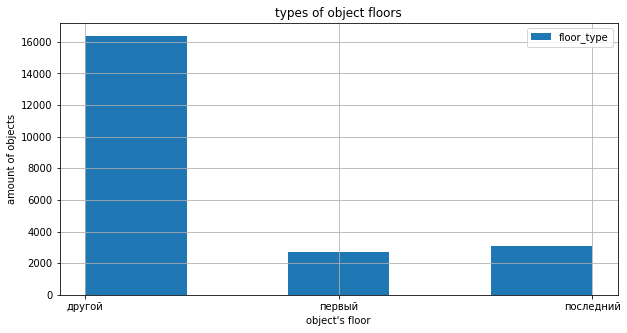

In [83]:
data['floor_type'].hist(bins=5, legend=True, figsize=(10,5))
plt.xlabel("object's floor")
plt.ylabel('amount of objects')
plt.title('types of object floors')
plt.show()

**Видим, что большинство квартир располагается ниже 5 этажа, при этом в основном это квартиры, расположенные не на первом, и не на последнем этаже дома.**

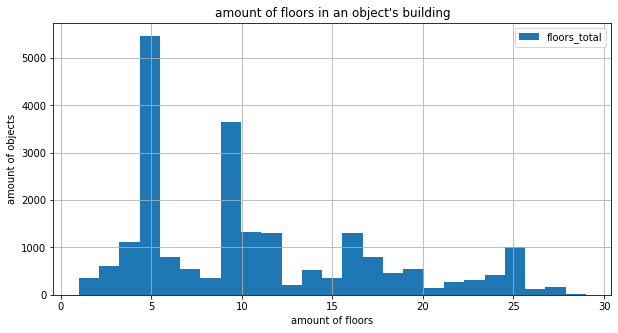

In [84]:
data['floors_total'].hist(bins=25, legend=True, figsize=(10,5))
plt.xlabel("amount of floors")
plt.ylabel('amount of objects')
plt.title("amount of floors in an object's building")
plt.show()

**Видим два ярко выраженных пика - больше всего в датафрейме пяти- и девятиэтажек.**

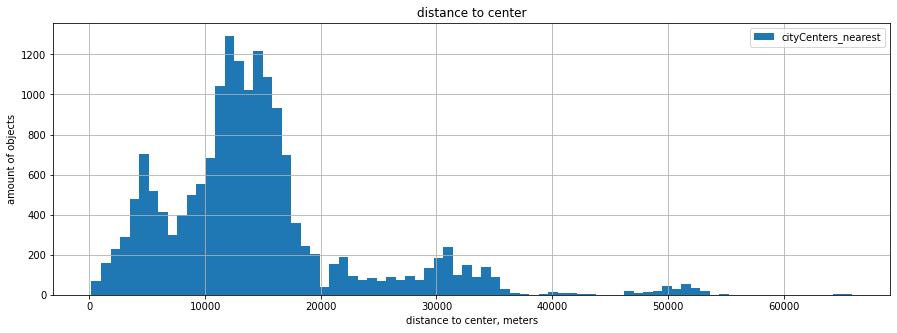

In [85]:
data['cityCenters_nearest'].hist(bins=80, legend=True, figsize=(15,5))
plt.xlabel("distance to center, meters")
plt.ylabel('amount of objects')
plt.title('distance to center')
plt.show()

**Чаще всего расстояние от квартиры до центра составляет от 8000 до 15000 метров.**

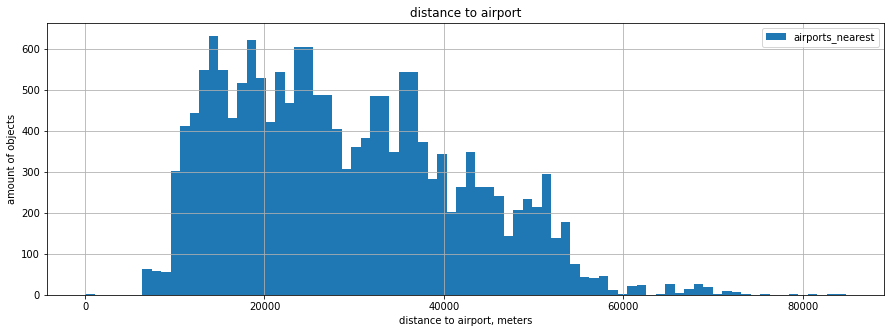

In [86]:
data['airports_nearest'].hist(bins=80, legend=True, figsize=(15,5))
plt.xlabel("distance to airport, meters")
plt.ylabel('amount of objects')
plt.title('distance to airport')
plt.show()

**Расстояние до аэропорта от большинства квартир укладывается в диапазон от 15000 до 50000 метров.**

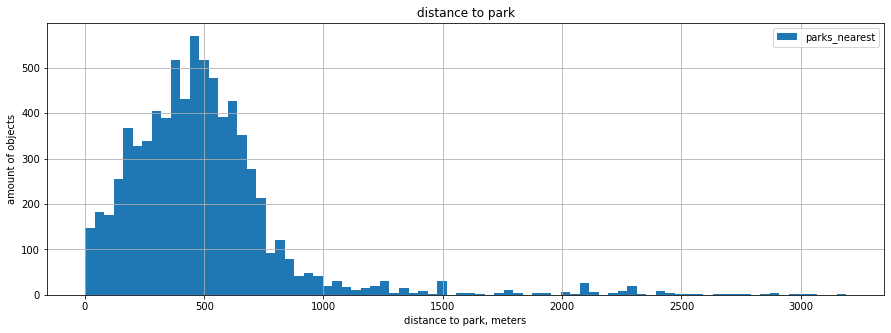

In [87]:
data['parks_nearest'].hist(bins=80, legend=True, figsize=(15,5))
plt.xlabel("distance to park, meters")
plt.ylabel('amount of objects')
plt.title('distance to park')
plt.show()

**Для большинства квартир расстояние до ближайшего парка не превышает 1000м. При этом для большого числа квартир данный столбец не заполнен.**

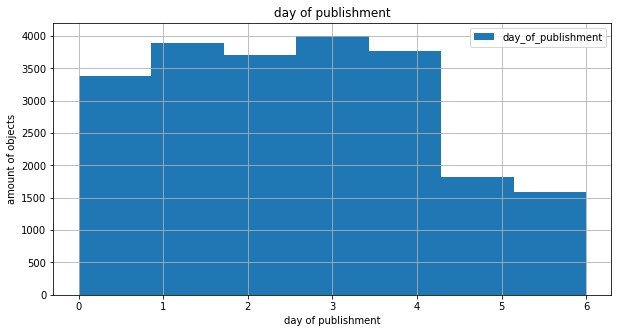

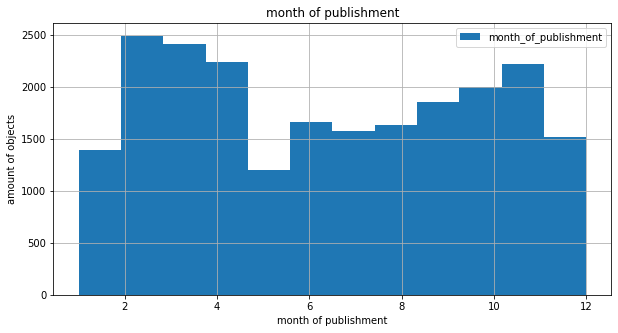

In [88]:
data['day_of_publishment'].hist(bins=7, legend=True, figsize=(10,5))
plt.xlabel("day of publishment")
plt.ylabel('amount of objects')
plt.title('day of publishment')
plt.show()

data['month_of_publishment'].hist(bins=12, legend=True, figsize=(10,5))
plt.xlabel("month of publishment")
plt.ylabel('amount of objects')
plt.title('month of publishment')
plt.show()

**В основном, объявления публикуют в будние дни, а также в весенние и осенние месяцы. В выходные дни и зимние, летние месяцы - заметно реже.** 

---

#### Анализ скорости продажи квартир

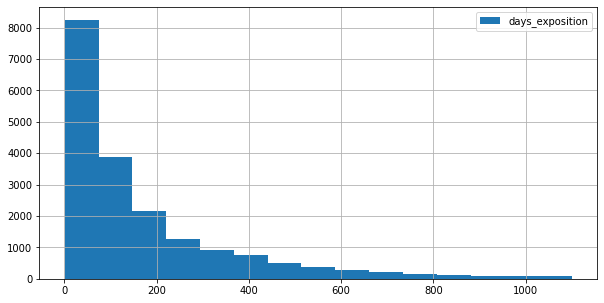

In [89]:
data['days_exposition'].hist(bins=15, legend=True, figsize=(10,5))
plt.show()

**По гистограмме можем сделать вывод, что обычно проходит менее 200 дней, до того момента, как квартира продается.**

In [90]:
data['days_exposition'].mode()

0   45.00
dtype: float64

In [91]:
data['days_exposition'].describe()

count   19173.00
mean      172.47
std       198.34
min         1.00
25%        45.00
50%        94.00
75%       226.00
max      1100.00
Name: days_exposition, dtype: float64

**Среднее значение количества дней до продажи - 172,47. Медианное значение - 94. Оценив квантили, мы можем сделать вывод, что продажи, которые занимают меньше 45 дней (что, кстати, является и модой для значений изучаемого столбца) - быстрые, соответственно удачные. При этом продажи, занимающие больше 226 дней можно отнести к долгим.** 

**Посмотрим также, как изменялась скорость продаж от года к году:**

In [92]:
data.groupby('year_of_publishment')['days_exposition'].describe().reset_index()

,year_of_publishment,count,mean,std,min,25%,50%,75%,max
0,2014,80.00,762.46,183.09,554.00,590.75,718.50,939.75,1085.00
1,2015,923.00,576.06,253.19,182.00,365.50,531.00,776.50,1099.00
2,2016,2559.00,321.09,254.61,3.00,116.00,236.00,477.50,1100.00
3,2017,7464.00,159.14,152.98,3.00,45.00,103.00,228.00,814.00
4,2018,7133.00,94.40,85.05,3.00,34.00,64.00,130.00,465.00
5,2019,1014.00,30.80,23.79,1.00,12.00,23.00,45.00,110.00


**Видим, что от года к году скорость продажи растет - медиана в 718 дней для 2014 года и 23 дня для 2019 года. Также заметно резкое увеличение количества проданных квартир в 2017 по сравнению с 2016 годом. Малое количество проданных в 2019 году квартир обусловлено меньшим числом объявлений, чем в другие года.**

---

#### Факторы, влияющие на стоимость объекта

**Построим графики, демонстрирующие зависимость стоимости объекта от:**
- **общей площади**;
- **жилой площади**;
- **площади кухни**;
- **количества комнат**;
- **этажа, на котором расположена квартира (первый, последний, другой);**
- **даты размещения (день недели, месяц, год).**

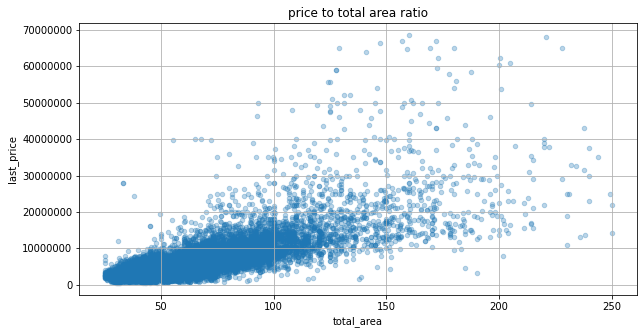

In [93]:
data.plot(kind='scatter', x='total_area', y='last_price', 
          alpha=0.3, grid=True, figsize=(10,5), title='price to total area ratio')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

**На графике явно видна вполне очевидная зависимость - чем больше площадь, тем больше и стоимость квартиры. При этом, цены растут не пропорционально увеличению площади, а с некоторым коэффициентом. Проверим, насколько данные значения коррелируют:**

In [94]:
data['last_price'].corr(data['total_area']) # коффициент корреляции Пирсона

0.7564272578246947

**Построим график рассеяния для пары стоимость объекта - площадь жилого помещения.**

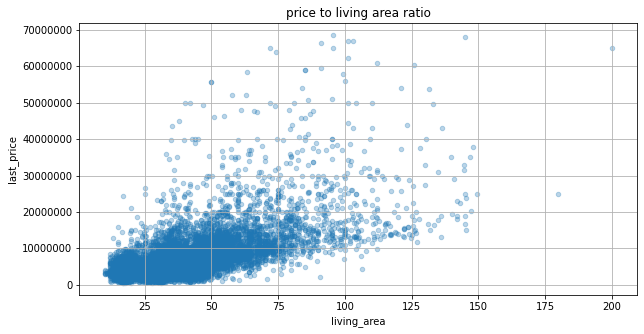

In [95]:
data.plot(kind='scatter', x='living_area', y='last_price',
          alpha=0.3, grid=True, figsize=(10,5), title='price to living area ratio')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

**По графику зависимость между стоимостью объекта и площадью жилого помещения менее наглядна, чем на предыдущем графике. Также вычислим коэффициент корреляции.**

In [96]:
data['last_price'].corr(data['living_area'])

0.6536453555321371

**Коэффициент корреляции действительно меньше, чем в предыдущем случае.**

**Построим график рассеяния для пары стоимость объекта - площадь кухни.**

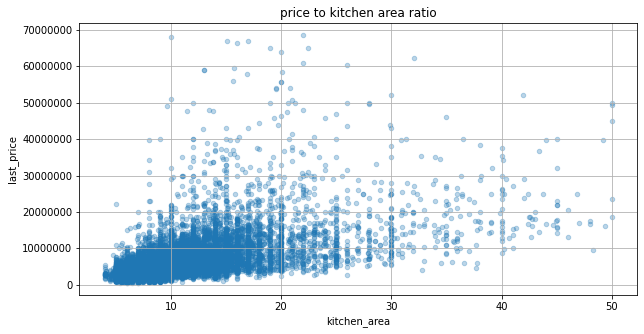

In [97]:
data.plot(kind='scatter', x='kitchen_area', y='last_price', 
          alpha=0.3, grid=True, figsize=(10,5), title='price to kitchen area ratio')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

**Здесь можем заметить, что помимо аналогичного "облачка", устремленного вверх (то есть с увеличением значения площади кухни растет и стоимость квартиры), на графике появились отчетливые полосы - то есть в некоторых случаях, при одном и том же значении площади кухни стоимость квартиры может значительно отличаться.**

**Коэффициент корреляции:**

In [98]:
data['last_price'].corr(data['kitchen_area'])

0.5755683240482898

**Примерно на том же уровне, что и между стоимостью и площадью жилого помещения.**

**Можно сделать вывод, что стоимость зависит от общей площади объекта, при этом в меньшей степени зависит от площади кухни или жилого помещения отдельно.**

**Посмотрим на зависимость стоимости объекта от количества комнат.**

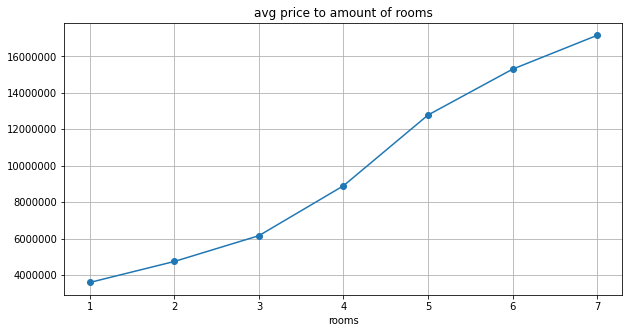

In [99]:
data.groupby('rooms')['last_price'].agg('median')\
.plot(style='o-', grid=True, title='avg price to amount of rooms', figsize=(10,5), xticks=(1,2,3,4,5,6,7))

plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

**На графике приведены сгруппированные, в зависимости от числа комнат в квартире, медианные значения стоимости для каждой группы. Видно, что зависимость практически линейная - чем больше комнат в квартире, тем больше ее стоимость.**
**Посчитаем коэффициент корреляции:**

In [100]:
price_to_rooms = data.groupby('rooms')['last_price'].agg('median').reset_index()

print('median to amount of rooms correlation:', 
      price_to_rooms['last_price'].corr(price_to_rooms['rooms']))

median to amount of rooms correlation: 0.9876718931444687


**Оценим зависимость между этажом, на котором расположена квартира, и ее стоимостью.**

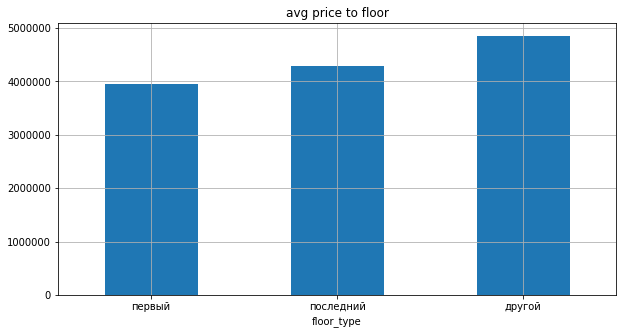

In [101]:
data.groupby('floor_type')['last_price'].agg('median').sort_values()\
.plot(kind='bar', grid=True, title='avg price to floor', figsize=(10,5), rot=0)
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

**Заметим, что в среднем, квартиры, расположенные на первом этаже, обладают наименьшей из всех 3 групп стоимостью. При этом, квартиры, расположенные не на последнем этаже, были самыми дорогими. Важно отметить, что разница в стоимости не очень существенна.**

**Оценим зависимость стоимости квартиры от дня/месяца/года, когда объявление с квартирой было выложено. Сгруппируем данные по дню и месяцу, и построим график для среднего и медианного значения стоимости для каждой группы.**

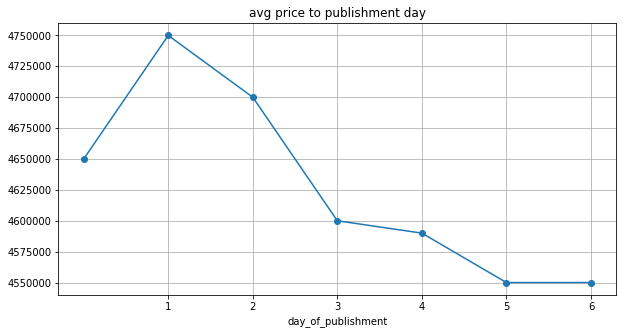

In [102]:
data.groupby('day_of_publishment')['last_price'].agg('median')\
.plot(style='o-', grid=True, title='avg price to publishment day', figsize=(10,5), rot=0, xticks=range(1,7))
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

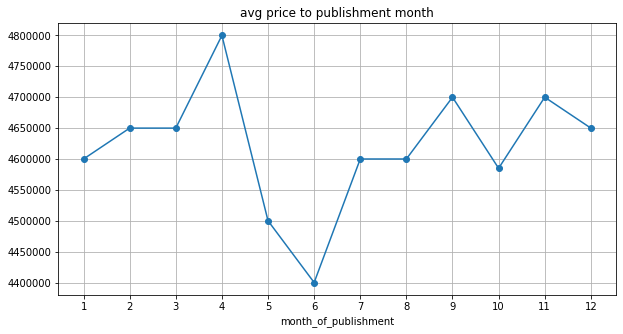

In [103]:
data.groupby('month_of_publishment')['last_price'].agg('median')\
.plot(style='o-', grid=True, title='avg price to publishment month', figsize=(10,5), rot=0, xticks=range(1,13))
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

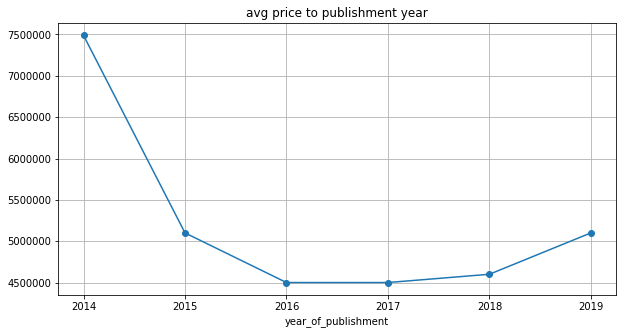

In [104]:
data.groupby('year_of_publishment')['last_price'].agg('median')\
.plot(style='o-', grid=True, title='avg price to publishment year', figsize=(10,5), rot=0, xticks=range(2014,2020))
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

**Зависимость можно увидеть только на графике для стоимости в зависимости от года публикации, на двух других (день и месяц) зависимостей нет. В 2014 медианная стоимость объекта была самой высокой (при этом важно учитывать, что в 2014 году было небольшое количество объявлений, возможно сервис только начинал работу), а далее стоимость снижалась с каждым годом вплоть до 2017, после чего вновь начала расти от года к году.**

---

#### Расчет средней стоимости квадратного метра в 10 самых популярных населенных пунктах

**Для данного расчета построим сводную таблицу, сгруппировав данные по 10 населенным пунктам, в которых расположено большинство объектов из датафрейма, затем построим график.**

In [105]:
data_cities = data.groupby('locality_name')[['last_price', 'total_area']]\
.agg(['count', 'sum']).sort_values(by=('last_price', 'count'), ascending=False).head(10).reset_index()
data_cities

locality_name last_price                 total_area          
                        count             sum      count       sum
0  Санкт-Петербург      14718 106029150106.00      14718 914263.65
1           Мурино        521   1971742700.00        521  23889.31
2          Кудрово        426   1910185438.00        426  20460.17
3           Шушары        419   1741951999.00        419  22977.41
4       Всеволожск        374   1435316426.00        374  21282.78
5           Пушкин        350   2168297964.00        350  20721.70
6          Колпино        330   1274621246.00        330  17271.42
7        Парголово        310   1403665459.00        310  16190.35
8          Гатчина        300   1047929360.00        300  15314.48
9           Выборг        225    744263000.00        225  12812.96

**Большинство объявлений из датафрейма расположено в Санкт-Петербурге. Теперь рассчитаем среднюю стоимость квадратного метра, а также построим график.**

In [106]:
data_cities['avg_sqr_meter_price'] = data_cities['last_price']['sum'] / data_cities['total_area']['sum']
data_cities[['locality_name', 'avg_sqr_meter_price']].sort_values(by='avg_sqr_meter_price', ascending=False)

,locality_name,avg_sqr_meter_price
,,
0,Санкт-Петербург,115972.18
5,Пушкин,104639.00
2,Кудрово,93361.17
7,Парголово,86697.66
1,Мурино,82536.61
3,Шушары,75811.50
6,Колпино,73799.45
8,Гатчина,68427.36
4,Всеволожск,67440.27


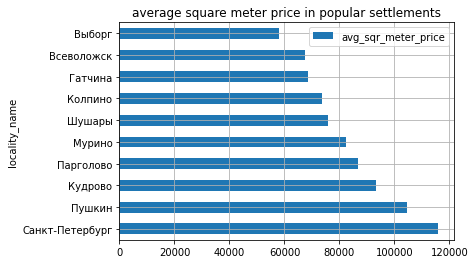

In [107]:
data_cities[['locality_name', 'avg_sqr_meter_price']].sort_values(by='avg_sqr_meter_price', ascending=False)\
.plot(kind='barh', x='locality_name', y='avg_sqr_meter_price', 
      rot=0, grid=True, title='average square meter price in popular settlements')
plt.show()

**Видим, что наибольшая цена за квадратный метр по прежнему в Санкт-Петербурге. Самая небольшая стоимость квартир в Выборге.**

---

#### Влияние удаленности от центра на стоимость квадратного метра в Санкт-Петербурге

**Построим график, чтобы посмотреть на зависимость средней стоимости объекта в Санкт-Петербурге в зависимости от расстояния до центра в км:**

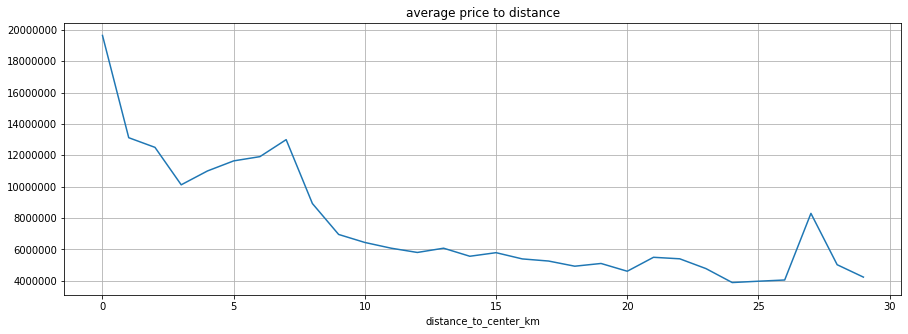

In [108]:
data_spb_by_distance = data.query('locality_name == "Санкт-Петербург"').groupby('distance_to_center_km')['last_price']\
.agg(['mean', 'count'])
data_spb_by_distance.plot(y='mean', title='average price to distance', grid=True, figsize=(15,5), legend=False)
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

**Видим выброс стоимости на 7, 27 км. Выброс, который случается на 7 км - начинается с 3 км. Изучим подробнее - скорее всего это связано с количеством объявлений или со слишком разными по стоимости объявлениями для каждой группы.**

In [109]:
data.query('distance_to_center_km == 27 & locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,types_of_distance,one_sqrmeter_price,day_of_publishment,month_of_publishment,year_of_publishment,floor_type,distance_to_center_km
748,13,14350000.00,74.00,2017-11-28,2,3.13,5,30.00,3,False,...,0.00,NaN,128.00,в пределах города,193918.92,1,11,2017,другой,27.00
5961,6,2250000.00,32.00,2018-02-27,1,2.60,2,16.50,2,False,...,0.00,NaN,178.00,в пределах города,70312.50,1,2,2018,последний,27.00


**Выброс на 27км действительно можно объяснить малым количеством объявлений в данной категории - всего 2. Выборка слишком мала, а объекты сильно отличаются друг от друга по стоимости (в основном из-за общей площади).**

**Теперь взглянем на категории квартир, которые продаются на 3-5км от центра:**

In [110]:
data_3_7_km = data.query('distance_to_center_km in (3,4,5,6,7) \
                         & locality_name == "Санкт-Петербург"')
distances_grouped = data_3_7_km.groupby(['distance_to_center_km', 'rooms'])[['last_price', 'total_area']].agg(['mean', 'count']).reset_index()
data_3_7_km.groupby('distance_to_center_km')['total_area'].sum()
distances_grouped['percentage_of_objects'] = distances_grouped['total_area']['count'] / data_3_7_km.groupby('distance_to_center_km')['total_area'].sum()

distances_grouped

distance_to_center_km rooms  last_price       total_area        \
                                      mean count       mean count   
0                   3.00     1  5736706.45    31      42.26    31   
1                   3.00     2  8254905.94   101      65.38   101   
2                   3.00     3 10416899.99   102      86.71   102   
3                   3.00     4 12874253.30    46     112.27    46   
4                   3.00     5 14214369.57    23     137.90    23   
5                   3.00     6 14890000.00     8     156.97     8   
6                   3.00     7 17230000.00     5     165.38     5   
7                   4.00     1  6659009.24    84      46.75    84   
8                   4.00     2  9049869.74   175      64.87   175   
9                   4.00     3 11067232.22   192      89.39   192   
10                  4.00     4 12922942.46   104     112.77   104   
11                  4.00     5 17032114.23    53     144.11    53   
12                  4.00     6 20656357.14    14     166.06    14   
13                  4.00     7 17856666.67     6     157.05     6   
14                  5.00     1  6862851.34   132      44.52   132   
15                  5.00     2  9719532.77   231      67.01   231   
16                  5.00     3 13145888.56   265      94.58   265   
17                  5.00     4 15079512.77   121     118.69   121   
18                  5.00     5 15835945.95    37     137.48    37   
19                  5.00     6 17716538.46    13     164.28    13   
20                  5.00     7 16765000.00     6     165.53     6   
21                  6.00     1  7005551.03   121      44.55   121   
22                  6.00     2  8995339.09   186      62.69   186   
23                  6.00     3 15785710.08   169      96.03   169   
24                  6.00     4 17189762.78    45     118.87    45   
25                  6.00     5 19697000.00    20     154.64    20   
26                  6.00     6 20147500.00     4     186.18     4   
27                  6.00     7 21681666.67     6     197.17     6   
28                  7.00     1  6399279.96    69      41.16    69   
29                  7.00     2  8678882.44   147      61.60   147   
30                  7.00     3 15727937.49   133      94.21   133   
31                  7.00     4 32197553.91    34     132.34    34   
32                  7.00     5 32190750.00     4     188.45     4   
33                  7.00     6 12412500.00     2     133.15     2   

   percentage_of_objects  
                          
0                    NaN  
1                    NaN  
2                    NaN  
3                   0.00  
4                   0.00  
5                   0.00  
6                   0.00  
7                   0.00  
8                    NaN  
9                    NaN  
10                   NaN  
11                   NaN  
12                   NaN  
13                   NaN  
14                   NaN  
15                   NaN  
16                   NaN  
17                   NaN  
18                   NaN  
19                   NaN  
20                   NaN  
21                   NaN  
22                   NaN  
23                   NaN  
24                   NaN  
25                   NaN  
26                   NaN  
27                   NaN  
28                   NaN  
29                   NaN  
30                   NaN  
31                   NaN  
32                   NaN  
33                   NaN

**Теперь посмотрим на выброс, который происходит на 3-7 км.**

In [111]:
# способы группировки и сортировки информации

(
    data
     .query('locality_name == "Санкт-Петербург"')
     .query('3 <= distance_to_center_km <= 7')
     .groupby(['distance_to_center_km', 'floor_type'])['last_price']
     .agg(['count', 'mean'])
     .style.format("{:,.0f}")
)

**Доля квартир на расстоянии 7км от центра, расположенных на первом или последнем этаже, по отношению к квартирам, расположенным на других этажах, меньше, чем для квартир, в 3-6 км от Центра. Как мы помним, квартиры, расположенные не на первом и последнем этажах в среднем дороже. Возможно, выброс средней стоимости объекта на 7км связан с этим. Для более точного ответа, необходимо проводить дополнительный анализ, который в решение данной задачи не входит.**

### Общий вывод

В проекте использовались данные из сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**В ходе предобработки данных**:
- заполнены или удалены пропуски (где это необходимо и не влияло на данные), 
- обработаны аномальные значения,
- добавлены вспомогательные столбцы, которые помогли провести исследование.

**В ходе проведения исследования:**
- изучены и описаны параметры объектов (значения площади, количество этажей, расстояния до центра и аэропорта и тд),
- проведен анализ скорости продаж объектов,
- построены сводные таблицы, графики, а также посчитаны коэффициенты корреляции, которые помогают сделать вывод о влиянии параметров на стоимость объекта.

**В качестве выводов:**
- Время, необходимое для продажи объекта, очень сильно отличается для различных объектов. Те продажи, которые совершаются в течение 45 дней (что, кстати, является и модой для значений изучаемого столбца) - быстрые, соответственно удачные. При этом продажи, занимающие больше 226 дней, можно считать долгими.
- Больше всего на стоимость объекта влияет количество комнат и значение общей площади объекта. Площадь кухни и жилого помещения отдельно на стоимость объекта влияет в меньшей степени.
- Самые недорогие объекты обычно расположены на первом этаже. При этом объекты, расположенные на последнем этаже, в среднем дешевле, чем объекты, располагающиеся на любых других этажах (кроме первого).
- День и месяц публикации на стоимость объекта не влияют.
- Больше всего объектов указанных в архиве находится в Санкт-Петербурге.
- Наибольшая средняя стоимость квадратного метра среди наиболее популярных по количеству объявлений в архиве - в Санкт-Петербурге, а также в городах, ближайших к нему.
- Влияние удаленности от центра на среднюю стоимость квадратного метра в Санкт-Петербурге есть, но оно не очень большое и линейное. Вероятнее всего, на среднюю стоимость квадратного метра в Санкт-Петербурге также влияют и несколько других факторов.
